In [64]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv('modeling_video_game_dataset.csv')

In [28]:
df.head()

,Year_of_Release,Global_players,Critic_Score,User_Score,Sequel,Lifecycle,MaxPlayers,Online,Licensed,Handheld,...,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,NA_Sales_More_Eu
0,2012,0.84,71.0,7.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,2002,1.27,75.0,8.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,2002,0.68,76.0,8.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,2002,0.46,70.0,8.7,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
4,2000,0.53,51.0,4.6,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
#seperate target and other features
target = df['NA_Sales_More_Eu']
features = df.drop(['NA_Sales_More_Eu'], axis=1)

In [30]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Scale

In [31]:
#scale data
sc=StandardScaler()
#firt model to training data - not testing data
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Handling Class Imbalance

In [32]:
#create false data - similar to KNN
sm = SMOTE(ratio=1.0)
X_train_scaled, y_train = sm.fit_sample(X_train_scaled, y_train)

In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([5898, 5898]))

## Baseline models

In [34]:
#print out some metrics about resulting prediction
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [35]:
#baseline logistic - use scaled data
print('baseline Logistic')
print('-------------------')
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Logistic
-------------------
train
Precision Score: 0.7609903189969847
Recall Score: 0.8129874533740251
Accuracy Score: 0.7788233299423534
F1 Score: 0.7861300106566113

test
Precision Score: 0.9136904761904762
Recall Score: 0.8247145735392881
Accuracy Score: 0.7989333333333334
F1 Score: 0.8669255206494881
-------------------
True Positives: 1228
True Negatives: 270
False Positives: 116
False Negatives: 261


In [36]:
#baseline K Nearest Neighbors - use scaled data
print('baseline K Nearest Neighbors')
print('-------------------')
lm = KNeighborsClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline K Nearest Neighbors
-------------------
train
Precision Score: 0.9468976018271793
Recall Score: 0.8435062733129874
Accuracy Score: 0.8981010512037979
F1 Score: 0.8922166427546628

test
Precision Score: 0.9005481597494127
Recall Score: 0.7723304231027536
Accuracy Score: 0.7514666666666666
F1 Score: 0.831525668835864
-------------------
True Positives: 1150
True Negatives: 259
False Positives: 127
False Negatives: 339


In [37]:
#baseline Decision Trees - use scaled data
print('baseline Decision Tree')
print('-------------------')
lm = DecisionTreeClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Decision Tree
-------------------
train
Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0

test
Precision Score: 0.8971308607417775
Recall Score: 0.8609805238415044
Accuracy Score: 0.8112
F1 Score: 0.8786840301576423
-------------------
True Positives: 1282
True Negatives: 239
False Positives: 147
False Negatives: 207


In [38]:
#baseline Random Forest - use scaled data
print('baseline Random Forest')
print('-------------------')
lm = RandomForestClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Random Forest
-------------------
train
Precision Score: 0.9982955513891256
Recall Score: 0.993048491013903
Accuracy Score: 0.995676500508647
F1 Score: 0.9956651083722907

test
Precision Score: 0.9083969465648855
Recall Score: 0.8791134989926125
Accuracy Score: 0.8336
F1 Score: 0.8935153583617748
-------------------
True Positives: 1309
True Negatives: 254
False Positives: 132
False Negatives: 180


In [39]:
#baseline XGBoost - use scaled data
print('baseline XGBoost')
print('-------------------')
lm = XGBClassifier()
lm.fit(X_train_scaled, y_train)
print('train')
train_preds = lm.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline XGBoost
-------------------
train
Precision Score: 0.8390157606947571
Recall Score: 0.8845371312309257
Accuracy Score: 0.8574092912851814
F1 Score: 0.8611753053813139

test
Precision Score: 0.9112508735150244
Recall Score: 0.8757555406312961
Accuracy Score: 0.8336
F1 Score: 0.8931506849315067
-------------------
True Positives: 1304
True Negatives: 259
False Positives: 127
False Negatives: 185


Without Tuning
- Logistic Regression had the biggest improvement to testing data
- KNN doesn't perform as well as the other models, had a lot of False Negatives
- Decision Trees looks well rounded
- Random Forest looks overfit
- XGBost looks to be the best model out of the bunch

## Model Tuning

In [40]:
#Logistic Regression Tuning
grid_params_lr = [{'penalty': ['l1', 'l2'], 
                    'C' : [0.001,0.01,0.01,1,2,5,10],
                    'fit_intercept': [True,False],
                    'max_iter': range(70,130,10)}] 

gs_lr = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=grid_params_lr,
                    scoring='f1',
                    cv=5)
gs_lr.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_lr.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_lr.best_estimator_)

#print results
print('Logistic Regression')
print('-------------------')

print('train')
train_preds = gs_lr.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_lr.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

0.784630603985053
{'C': 1, 'fit_intercept': True, 'max_iter': 70, 'penalty': 'l1'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=70, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Logistic Regression
-------------------
train
Precision Score: 0.76114902396445
Recall Score: 0.813157002373686
Accuracy Score: 0.7789928789420142
F1 Score: 0.7862939585211902

test
Precision Score: 0.913626209977662
Recall Score: 0.8240429818670248
Accuracy Score: 0.7984
F1 Score: 0.8665254237288137
-------------------
True Positives: 1227
True Negatives: 270
False Positives: 116
False Negatives: 262


In [53]:
#KNN tuning
grid_params_KNN = [{'n_neighbors': range(1,50,2),
                    'p': [1,2,3]}] 

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=grid_params_KNN,
                           scoring='f1',
                           cv=5,
                           verbose=5)
gs_KNN.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_KNN.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_KNN.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_KNN.best_estimator_)

#print results
print('K Nearest Neighbors')
print('-------------------')

print('train')
train_preds = gs_KNN.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_KNN.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... n_neighbors=1, p=1, score=0.8653594771241829, total=   1.6s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ..... n_neighbors=1, p=1, score=0.8836395450568678, total=   1.5s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s


[CV] ..... n_neighbors=1, p=1, score=0.8866636322257625, total=   1.5s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.7s remaining:    0.0s


[CV] ..... n_neighbors=1, p=1, score=0.8880833710919801, total=   1.8s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.4s remaining:    0.0s


[CV] ..... n_neighbors=1, p=1, score=0.8877828054298643, total=   1.5s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ..... n_neighbors=1, p=2, score=0.8613464110566205, total=   2.4s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ..... n_neighbors=1, p=2, score=0.8658698539176627, total=   1.7s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ..... n_neighbors=1, p=2, score=0.8786074209803023, total=   1.6s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ..... n_neighbors=1, p=2, score=0.8756310234052317, total=   1.6s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ...... n_neighbors=1, p=2, score=0.874256973022405, total=   2.1s
[CV] n_neighbors=1, p=3 ..............................................
[CV] ..... n_neighbors=1, p=3, score=0.8481581311769991, total=  10.3s
[CV] n_neighbors=1, p=3 ..............................................
[CV] .

[CV] ..... n_neighbors=9, p=1, score=0.8425760286225403, total=   1.9s
[CV] n_neighbors=9, p=1 ..............................................
[CV] ..... n_neighbors=9, p=1, score=0.8251996450754215, total=   1.9s
[CV] n_neighbors=9, p=1 ..............................................
[CV] ..... n_neighbors=9, p=1, score=0.8364918466284706, total=   1.8s
[CV] n_neighbors=9, p=2 ..............................................
[CV] ..... n_neighbors=9, p=2, score=0.7906153165117308, total=   1.9s
[CV] n_neighbors=9, p=2 ..............................................
[CV] ..... n_neighbors=9, p=2, score=0.8049866429207481, total=   1.8s
[CV] n_neighbors=9, p=2 ..............................................
[CV] ..... n_neighbors=9, p=2, score=0.8163828808099401, total=   1.8s
[CV] n_neighbors=9, p=2 ..............................................
[CV] ..... n_neighbors=9, p=2, score=0.7921245421245421, total=   1.8s
[CV] n_neighbors=9, p=2 ..............................................
[CV] .

[CV] .... n_neighbors=17, p=1, score=0.7955706984667803, total=   1.9s
[CV] n_neighbors=17, p=1 .............................................
[CV] .... n_neighbors=17, p=1, score=0.8165019338203696, total=   1.9s
[CV] n_neighbors=17, p=1 .............................................
[CV] .... n_neighbors=17, p=1, score=0.8295904887714662, total=   2.0s
[CV] n_neighbors=17, p=1 .............................................
[CV] .... n_neighbors=17, p=1, score=0.8111209179170346, total=   1.9s
[CV] n_neighbors=17, p=1 .............................................
[CV] .... n_neighbors=17, p=1, score=0.8149760557248585, total=   1.9s
[CV] n_neighbors=17, p=2 .............................................
[CV] ..... n_neighbors=17, p=2, score=0.769162605228179, total=   1.9s
[CV] n_neighbors=17, p=2 .............................................
[CV] .... n_neighbors=17, p=2, score=0.7980427046263345, total=   1.8s
[CV] n_neighbors=17, p=2 .............................................
[CV] .

[CV] .... n_neighbors=23, p=3, score=0.7707006369426752, total=  12.3s
[CV] n_neighbors=23, p=3 .............................................
[CV] .... n_neighbors=23, p=3, score=0.7646791078743741, total=  12.0s
[CV] n_neighbors=25, p=1 .............................................
[CV] .... n_neighbors=25, p=1, score=0.7768240343347639, total=   2.0s
[CV] n_neighbors=25, p=1 .............................................
[CV] .... n_neighbors=25, p=1, score=0.8036410923276983, total=   2.0s
[CV] n_neighbors=25, p=1 .............................................
[CV] .... n_neighbors=25, p=1, score=0.8046976946498478, total=   2.0s
[CV] n_neighbors=25, p=1 .............................................
[CV] .... n_neighbors=25, p=1, score=0.8010471204188481, total=   2.0s
[CV] n_neighbors=25, p=1 .............................................
[CV] ..... n_neighbors=25, p=1, score=0.811443433029909, total=   1.9s
[CV] n_neighbors=25, p=2 .............................................
[CV] .

[CV] .... n_neighbors=31, p=3, score=0.7572727272727272, total=  16.4s
[CV] n_neighbors=31, p=3 .............................................
[CV] .... n_neighbors=31, p=3, score=0.7577132486388384, total=  13.7s
[CV] n_neighbors=31, p=3 .............................................
[CV] ..... n_neighbors=31, p=3, score=0.758371040723982, total=  12.8s
[CV] n_neighbors=31, p=3 .............................................
[CV] .... n_neighbors=31, p=3, score=0.7635043123014071, total=  13.1s
[CV] n_neighbors=33, p=1 .............................................
[CV] .... n_neighbors=33, p=1, score=0.7685738684884714, total=   2.5s
[CV] n_neighbors=33, p=1 .............................................
[CV] ..... n_neighbors=33, p=1, score=0.795523030563926, total=   2.1s
[CV] n_neighbors=33, p=1 .............................................
[CV] .... n_neighbors=33, p=1, score=0.7987962166809973, total=   2.2s
[CV] n_neighbors=33, p=1 .............................................
[CV] .

[CV] .... n_neighbors=39, p=2, score=0.7731316725978647, total=   7.8s
[CV] n_neighbors=39, p=3 .............................................
[CV] .... n_neighbors=39, p=3, score=0.7232267037552156, total=  53.0s
[CV] n_neighbors=39, p=3 .............................................
[CV] .... n_neighbors=39, p=3, score=0.7464724624487938, total=  49.2s
[CV] n_neighbors=39, p=3 .............................................
[CV] .... n_neighbors=39, p=3, score=0.7406733393994541, total=  50.4s
[CV] n_neighbors=39, p=3 .............................................
[CV] ..... n_neighbors=39, p=3, score=0.748638838475499, total=  50.3s
[CV] n_neighbors=39, p=3 .............................................
[CV] .... n_neighbors=39, p=3, score=0.7571234735413839, total= 1.7min
[CV] n_neighbors=41, p=1 .............................................
[CV] .... n_neighbors=41, p=1, score=0.7590928540864356, total=   2.8s
[CV] n_neighbors=41, p=1 .............................................
[CV] .

[CV] .... n_neighbors=47, p=2, score=0.7650417215634607, total=   3.4s
[CV] n_neighbors=47, p=2 .............................................
[CV] ...... n_neighbors=47, p=2, score=0.76657824933687, total=   2.5s
[CV] n_neighbors=47, p=2 .............................................
[CV] .... n_neighbors=47, p=2, score=0.7654537483559842, total=   2.3s
[CV] n_neighbors=47, p=3 .............................................
[CV] .... n_neighbors=47, p=3, score=0.7239944521497919, total=  13.8s
[CV] n_neighbors=47, p=3 .............................................
[CV] .... n_neighbors=47, p=3, score=0.7473827947200727, total=  13.9s
[CV] n_neighbors=47, p=3 .............................................
[CV] .... n_neighbors=47, p=3, score=0.7432432432432432, total=  14.8s
[CV] n_neighbors=47, p=3 .............................................
[CV] ..... n_neighbors=47, p=3, score=0.751346499102334, total=  13.7s
[CV] n_neighbors=47, p=3 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 200.9min finished


0.8823038579720744
{'n_neighbors': 1, 'p': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=1,
           weights='uniform')
K Nearest Neighbors
-------------------
train
Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0

test
Precision Score: 0.8762035763411279
Recall Score: 0.8556077904633983
Accuracy Score: 0.7893333333333333
F1 Score: 0.8657832144070676
-------------------
True Positives: 1274
True Negatives: 206
False Positives: 180
False Negatives: 215


In [48]:
#Decision Trees
grid_params_dt = [{'criterion': ['gini','entropy'], 
                    'min_samples_leaf' : range(5,100,15),
                    'max_depth': range(2,20,1)}] 

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=grid_params_dt,
                    scoring='f1',
                    cv=5,
                    verbose=1)
gs_dt.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_dt.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_dt.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_dt.best_estimator_)

#print results
print('Decision Trees')
print('-------------------')

print('train')
train_preds = gs_dt.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_dt.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8549074453670996
{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Trees
-------------------
train
Precision Score: 0.9263989245504957
Recall Score: 0.9347236351305527
Accuracy Score: 0.9302305866395388
F1 Score: 0.9305426618280024

test
Precision Score: 0.8967428967428968
Recall Score: 0.8690396239086635
Accuracy Score: 0.8165333333333333
F1 Score: 0.8826739427012278
-------------------
True Positives: 1294
True Negatives: 237
False Positives: 149
False Negatives: 195


[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:   56.9s finished


In [58]:
#Random Forest
grid_params_rf = [{'criterion': ['gini','entropy'], 
                    'min_samples_leaf' : range(1,6,1),
                    'max_depth': range(2,20,1),
                    'n_estimators': range(10,21,10),
                    'min_samples_split' : range(2,10,2)}] 

gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=grid_params_rf,
                    scoring='f1',
                    cv=5,
                    verbose=5)
gs_rf.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_rf.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_rf.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_rf.best_estimator_)
print('\n')
#print results
print('Random Forest')
print('-------------------')

print('train')
train_preds = gs_rf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_rf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7551737602499023, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7397888939880679, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7751155947877258, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7981686379244564, total=   0.0s
[CV] criterion=gini, max_depth=2, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7806228373702423, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.7663903541823662, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.7871422971383771, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.7919561243144425, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.7500000000000001, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.7698350353495679, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.787878787878788, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.7971303308090874, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8036565977742448, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.7976056864945754, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.7697236684020825, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.7855711422845691, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.77926285945727, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7648384673178062, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7768187422934649, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7809680065627564, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7912871287128713, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7899838449111471, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7904950495049505, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7888563049853373, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7671665351223362, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7817445712182556, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.793531402783001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7852760736196318, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.7765595463137996, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.7896389324960754, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8203642384105961, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.7937898089171974, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7793130675088827, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7928286852589641, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8068320455469703, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7838915470494418, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.7979438513246342, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.7601998334721065, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.7785744411640657, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.7627979679562329, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8074484944532487, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7639999999999999, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7531622696060717, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7915980230642504, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.798531810766721, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8017585931254995, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8034388432981634, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.7607505863956215, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7683261466091729, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7864192656928544, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.798522773902339, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7955665024630542, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.7988871224165341, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.7632311977715878, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.7989002356637862, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8026154474867184, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.7969255663430421, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.779757085020243, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.767144517628826, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.7953729557239728, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.7911290322580645, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.7899432278994323, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.7813798836242727, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.7690494893951295, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.765183752417795, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.7893481717011128, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.807478122513922, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.797947908445146, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.79

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8062080536912752, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.7940346634421603, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.7698713096139288, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.7978056426332288, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.7707692307692307, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.7972701726214371, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8096026490066225, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8021934978456717, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.7951706910907577, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8006509357200976, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.7701815372730785, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.800314465408805, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.7653457653457654, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8085922516302262, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8037383177570093, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8014705882352942, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8035563082133785, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8073754413495488, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8106796116504855, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.7756190476190477, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.77217125382263, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8019480519480519, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8209851822186623, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.823005265289591, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.83

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8072338676531031, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.7766914352757138, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8078277886497065, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8236266005782733, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8129439621152328, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.815485996705107, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8180718031464301, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8155493851646172, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8232344337651483, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7699999999999998, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8008064516129033, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8089528377298163, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8149068322981367, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8129952456418384, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8254230293025175, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.7782945736434108, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7712264150943396, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8086642599277979, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8158210147822612, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8207395498392284, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8139630390143736, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8132746901239505, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8279150411790203, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.7757761594480644, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.781092599767532, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8127236580516898, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8221859706362152, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8323840520748577, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.841407867494824, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.819346837536172, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.829971181556196, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.7885075818036712, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.81

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.7721324095458044, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8177379983726606, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8356614626129827, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8282582216808769, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8276147168251343, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8215540804373292, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8393005828476269, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.7761775009731413, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8453947368421052, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.7838479809976248, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8240131578947368, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8345381526104417, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8250204415372037, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8312757201646092, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8390480032271077, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8446641944787804, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.7811394891944989, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8246253543944917, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.849673202614379, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8257909491389668, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8384740259740261, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8359532446594116, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8491666666666666, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.7818674932196822, total=   0.3s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8484342379958246, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.7889837083010085, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8148148148148148, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8257482574825747, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8533221897200167, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8498769483182936, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8554621848739496, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.7921326648669493, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8421052631578947, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.792659117532214, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8193939393939395, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8376353039134055, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8439597315436241, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8415300546448087, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8400328137817884, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.783081102056655, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8472049689440994, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7874905802562171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8205546492659053, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8365465213746857, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8407331975560082, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8446480633069554, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8427152317880795, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8597662771285476, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0

[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7865947611710323, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8262131895479055, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8432026688907424, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8437113402061855, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0

[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8648648648648648, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8508333333333333, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.80047040376323, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8432563791008505, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=20, 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.85559265442404, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8303715670436188, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8638655462184874, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7992156862745099, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=20, 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8518518518518517, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.789126213592233, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8311148086522462, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8560574081891094, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=10,

[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.843363561417972, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8599238256453661, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8630079597821534, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7917956656346749, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=10,

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.7927996936039831, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8393866020984664, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8528678304239401, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8459016393442623, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=20

[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8600654664484452, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.854149203688181, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8050749711649364, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8474714518760196, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20,

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.853781512605042, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8633210934312526, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8505550811272417, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8037750688163586, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20,

[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8625632377740303, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8030651340996169, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8390480032271078, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8587094053142135, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8577371048252913, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8590272052761747, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8584628307433851, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8032723022984027, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10

[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8038387715930901, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.832923832923833, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8601694915254238, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8519134775374376, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20,

[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8605042016806723, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8708010335917312, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8072755417956656, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8505367464905037, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8694539249146759, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8594548551959116, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8732993197278912, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8104728409534975, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8744146445295871, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8067744418783679, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.845626763401854, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.866723259762309, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10, 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8523654159869494, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8627780109106169, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8656210258584146, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.860524091293322, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=10,

[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8546292417260158, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8065908199293841, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8498769483182937, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8625472887767969, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=20

[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.877843302443134, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.8837011884550084, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8127889060092449, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8593685936859368, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, n_estimators=20,

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8035714285714286, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8523517382413087, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8672268907563025, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8746846089150547, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=10

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8754237288135593, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8867204072974119, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8722058203289752, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8100970873786408, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=10

[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8098207326578332, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8598516075845013, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8733475479744136, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8759983186212695, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=8, n_estimators=20

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8694172692471289, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8697850821744627, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8659619450317124, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8082458187475691, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=8, n_estimators=20

[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8702749140893471, total=   0.4s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8095052590572653, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8348178137651822, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.855421686746988, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=8, n_estimators=10,

[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8942184154175589, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8812131423757372, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8830610490111779, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8116959064327487, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=8, n_estimators=10

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8767590618336887, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.816967792615868, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8616761594792514, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8908857509627728, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, n_estimators=20,

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8618018752547901, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8841016803102111, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8802698145025296, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8785683851725606, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=6, n_estimators=20

[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8765957446808511, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.807617567042363, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8487293263412666, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.882303132938188, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=6, n_estimators=10, 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8470490440565253, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.872849349559379, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8777589134125636, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8785286569717707, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=6, n_estimators=10,

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8918116249469664, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8950988822012038, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8215671062839409, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8680182043856021, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8148437499999999, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8492693110647183, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8791773778920308, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8828291435875585, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8843537414965986, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8805779855503613, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8868005126014523, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8141249514939852, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=4, n_estimators=10

[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8122813835989118, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8545678000819337, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8834408602150537, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.873369793857804, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=20,

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8774904620601951, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8777162334895613, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8734554750745633, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8093385214007781, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=20

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8717511717085642, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.82421875, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.8682559598494355, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.8854166666666666, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=

[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8966108966108965, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8940481215702827, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8972926514825956, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8171114599686028, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=10

[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8148148148148148, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8654634946677605, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8958422631804545, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.89238621863037, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=20, 

[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8881298035866779, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8168028004667445, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8631319358816276, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.887942053685556, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=8, n_estimators=20,

[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8531353135313531, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8824795523030564, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8721030042918454, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8710232158211522, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20

[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8725868725868725, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8068269976726145, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8485099337748345, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8693790149892934, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10

[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.869885433715221, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9057093425605536, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9043552519214345, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9048027444253858, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10,

[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8925193465176269, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8894645941278065, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8220140515222483, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.875, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.892

[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8657331136738056, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8852173913043478, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8872758326216909, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8947368421052632, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=20

[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8910721913712089, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8127458693941778, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8551324503311258, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8852878464818764, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10

[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8868005126014524, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8887000849617672, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.879760376551134, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8171959721146398, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=6, n_estimators=10,

[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8364341085271318, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8736286062576188, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.9065743944636678, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.9068269643623873, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8974688974688976, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8838625489343194, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8253843121797398, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8701406120760959, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8694214876033057, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8907127429805616, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8800690250215704, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8903115663679044, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=20

[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8857630008525149, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8925193465176269, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8119590873328087, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8550062318238472, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=10

[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8174322732626619, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8572597137014316, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8869789428448648, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8853855986365573, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=20

[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.9039792387543253, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.9027777777777777, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.843664717348928, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8827642945290004, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=20,

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8696009872480461, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.9019438444924406, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.889943892965041, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8980645161290323, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=20,

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.9025862068965518, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8969072164948453, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8136117556071153, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8643790849673204, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=10

[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8173710740597131, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8621262458471761, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8988764044943821, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8921357971637301, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8, n_estimators=20

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8845166809238666, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8850085178875641, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8168355416991426, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8580777096114519, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=8, n_estimators=20

[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8139717425431711, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8489326765188834, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8797603765511339, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8819235723486475, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=8, n_estimators=10

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7797029702970297, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7916349809885932, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7952362658470995, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.7647987371744277, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.7747609942638624, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.7889447236180905, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.7627118644067796, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.7877376794722546, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.7647279549718574, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.7740652346857596, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.7809446254071661, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.7632241813602015, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8083567697870632, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.7863512989530828, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.7926926131850676, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.7644411102775694, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.7654135338345865, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.7748607796340493, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.784570596797671, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.7884080984517665, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=4

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.7655250282273242, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.7870445344129555, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8003114052160374, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8020108275328693, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.7999999999999999, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.7969111969111968, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.7759450171821305, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8110137672090112, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.7973755306831338, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.7725540025412961, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8034468608945424, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.7585385226370134, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.7889022919179735, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.7940928270042195, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.7968565815324166, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.7912350597609562, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.7968565815324165, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.7844382691544263, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.7805456702253856, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.7718332022029898, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7747273411056789, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7965970610982213, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7978395061728395, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.7980376124284546, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.7959343236903832, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8069164265129682, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8064012490241999, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7687619047619048, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7838827838827839, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8063492063492064, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7917174177831912, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.7945967421533572, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8004741209008297, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8044123886296138, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8065286624203822, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8120240480961923, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8003084040092521, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8006392329204954, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7762104460541366, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8168789808917197, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8086816720257235, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.764413898434517, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.7915335463258787, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=6

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8192771084337349, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.7647058823529412, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.7966772151898734, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8105761641673245, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.7691717791411044, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8012743926722422, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.81285140562249, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.810379241516966, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.7720494247976141, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8199381761978362, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8129406885109912, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8065416832867971, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8111111111111111, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8215598203348305, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.7663410969196093, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.7916502560063017, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8001648125257519, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8137373737373738, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8247758761206193, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8046166529266282, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.8070898598516076, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.8014827018121912, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.7752442996742672, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8083028083028082, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=20, score=0.8281829419035848, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.7742418569824036, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.7967413441955195, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8157676348547719, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.7797001153402537, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8121457489878543, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8128872366790583, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8197908286403862, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8204309656823622, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8028169014084507, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.8145667643365425, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.7735486351403306, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=20, score=0.8294856217091939, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.7717908082408874, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8145512060102807, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8021567814184986, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.7692904226444358, total=   0.3s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8132746901239505, total=   0.3s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8160828025477708, total=   0.3s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8156288156288155, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.785870039249891, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8207705192629816, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.827835880933226, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=10, score=0.8163592622293504, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=6,

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8419742845292411, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8251012145748987, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=20, score=0.8303425774877651, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.7725155279503104, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.7783251231527094, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8188082691528173, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.828150572831424, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.82920688208141, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8131779831257534, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8157148643175375, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8264669163545568, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.7806004618937644, total=   0.3s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8345802161263508, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.7755905511811023, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8126540673788003, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.823086574654956, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.7806576402321083, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.82829954489036, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8490962589323245, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8375510204081632, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2,

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8297957549058871, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.8402806438299628, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.7827415043909889, total=   0.4s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8266776451214493, total=   0.3s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=20, score=0.8432026688907424, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.7794793261868301, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8033755274261604, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8257417467613873, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.7836026803310997, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8271298593879239, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8228155339805826, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.833809718252348, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=8

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8372476308199422, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8238731218697829, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8345509239363987, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7781622452902729, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8307053941908714, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.7849544072948329, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8286066584463626, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8262131895479055, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.7976331360946747, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8381106176826807, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8418856904463914, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8349673202614378, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8361858190709046, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8337510442773601, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8455696202531646, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.784692694240433, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8457627118644068, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.783679753656659, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.827165514436763, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.841223292836196, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, 

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.7864741641337387, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8295819935691318, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8445360824742268, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.844059405940594, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8359700249791842, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8435430463576158, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8320000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.7835130970724191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.8620116375727349, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.7856324035154757, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8352365415986951, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8571428571428572, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.7972082202404033, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8378158109209454, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8555743243243243, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8566694283347142, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8511879949979158, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8488042156465343, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8559139784946236, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8003101977510663, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8480535789033068, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.7924970691676436, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8272208638956805, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8414429530201343, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.7933177933177934, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8381030253475061, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8496621621621622, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8506600660066006, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8631840796019901, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8483075637275387, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8494077834179357, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7987616099071208, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8763102725366876, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8107476635514019, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8364083640836408, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8594142259414227, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.7956740054074933, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8473029045643153, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8620545073375262, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8570227081581161, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8497184928540494, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8593155893536122, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8582214765100671, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8042039704165044, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8658119658119658, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.7917462743599543, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8409658617818486, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8564124414145717, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.7976699029126214, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8368442792234614, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8587047939444912, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8509933774834436, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8686192468619246, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8543771043771043, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8735244519392917, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8144087705559907, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8748943364327979, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.799844539448115, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8535084119819449, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.869382612347753, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.840639082343302, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8642495784148397, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8735919899874843, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8713204373423044, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_sample

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8687631027253669, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8504398826979471, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8590774439272111, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8039370078740157, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8665263157894737, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.7921259842519685, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.849017147636972, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8605042016806722, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_sample

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.7973805855161787, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8432835820895523, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8714893617021275, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8629737609329446, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8557336621454993, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8661283467913301, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.864385297845374, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8774468085106383, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_sample

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8689771766694844, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8783783783783784, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8060278207109737, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8438923395445136, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8659265584970112, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8018397853583749, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.849673202614379, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8768768768768769, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_sample

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.842968429684297, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8696752425137073, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.870777027027027, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8587234042553191, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8728033472803347, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.866751809280545, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8010814986481267, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=10, score=0.8391666666666667, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_sample

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8802395209580838, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.810623556581986, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8495867768595041, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20, score=0.8912489379779099, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_sample

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8529291274068004, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8786324786324786, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.872681281618887, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8819297503173931, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_sample

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.881471972614463, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8793542905692439, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8742616033755274, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=10, score=0.8029480217222652, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_sample

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.878622427551449, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8644781144781144, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.814580031695721, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=20, score=0.8556193601312552, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.885883347421809, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.802789616427741, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8476710029374739, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.864102564102564, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.811167119038387, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8550308008213553, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8761099365750528, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8706382978723404, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_sample

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8624229979466119, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8854760860026327, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8856181665264928, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8820033955857386, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8850233347475606, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8850380388841926, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8938166311300638, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.8081821690467003, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8795944233206591, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8850918410935497, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8157589803012747, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=20, score=0.8572597137014316, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8802395209580838, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.809956538917424, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8580803937653815, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8794871794871795, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_sample

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8084276238782677, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8587943848059455, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8837606837606837, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8784013605442177, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8677204658901829, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8930434782608696, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8895497026338148, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8946236559139785, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8936719758932415, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8939264328485885, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8945548833189283, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.8171874999999998, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8757037678648765, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8159126365054603, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8634288086342882, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.8943993159469859, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8499184339314845, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8892674616695061, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8767932489451477, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8803786574870912, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8827527612574343, total=   0.4s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8873778155546111, total=   0.6s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8847139197267293, total=   0.5s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=10, score=0.8046242774566474, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8757841907151819, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8806161745827985, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.8124759337697344, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=20, score=0.85078318219291, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9093253115599484, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8246778602108552, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8699588477366256, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.8959861890375486, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8181468665897731, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8670520231213873, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.8995708154506438, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20, score=0.9016393442622951, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.85772690106296, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8885106382978724, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8816291896478575, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.8915766738660906, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8932704672096013, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8828361435365327, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8902281532501077, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10, score=0.8098399062866067, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_sampl

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.879045996592845, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8724946695095949, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8155642023346303, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20, score=0.8531120331950208, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_sample

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.9023655913978496, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.8232558139534883, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.872366790582404, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.9, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_es

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.826885502149277, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8671328671328673, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.8946910356832029, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.9002141327623125, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_sample

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8652657601977749, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8857630008525149, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8870759982825248, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.8944895343870142, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_sampl

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.897180043383948, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.888027562446167, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.8959236773633998, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=10, score=0.8181465684373789, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.8852599914052428, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=10, score=0.883419689119171, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.817898832684825, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=20, score=0.8707818930041152, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=8, n_estimators=20 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=6, n_estimators=20, score=0.8875484704868591, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8165495706479313, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.8511513157894737, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10, score=0.882937365010799, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=8, n_estimators=10 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_sample

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8278529980657641, total=   0.4s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.8801976121860847, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9110723626852659, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20, score=0.9089354424967936, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8657937806873978, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8967013888888888, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8936719758932414, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=10, score=0.8883094306823122, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_sampl

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8969072164948454, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8970840480274443, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=0.8980121002592912, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=6, n_estimators=10, score=0.821747572815534, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_sample

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.8817755014938112, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.888027562446167, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8192024777390631, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=20, score=0.8598594460520876, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_sample

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.8895522388059701, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8205527442584662, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8536184210526315, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10, score=0.8826049700085691, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=10 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_sampl

[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 16.8min finished


0.8923579936729329
{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Random Forest
-------------------
train
Precision Score: 0.9643511577544561
Recall Score: 0.9815191590369616
Accuracy Score: 0.9726178365547643
F1 Score: 0.9728594235778506

test
Precision Score: 0.9048257372654156
Recall Score: 0.9066487575554063
Accuracy Score: 0.8501333333333333
F1 Score: 0.9057363300905736
-------------------
True Positives: 1350
True Negatives: 244
False Positives: 142
False Negatives: 139


In [59]:
#XGBoost
grid_params_xgb = [{'max_depth': range(2,10,1),
                    'learning_rate': [0.01, 0.1, 1],
                    'colsample_bytree': [0.01, 0.1, 1],
                    'alpha': [0, 0.1, 1],
                    'eta': [0.1, 0.3, 0.5]}] 

gs_xgb = GridSearchCV(estimator=XGBClassifier(),
                    param_grid=grid_params_xgb,
                    scoring='f1',
                    cv=5,
                    verbose=5)
gs_xgb.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_xgb.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_xgb.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_xgb.best_estimator_)
print('\n')
#print results
print('XGBoost')
print('-------------------')

print('train')
train_preds = gs_xgb.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_xgb.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7524972253052163, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8313788920339669, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8507399577167019, total=   1.0s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8564356435643564, total=   1.0s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8536585365853658, total=   1.4s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7576840600428878, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8436132113012336, total=   1.6s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8669744020142677, total=   1.1s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8694228407695456, total=   1.1s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV] 

[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8441767068273093, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8774302620456467, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8728636932055022, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.872742545149097, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=4, score=0.7568345323741007, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, c

[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.8861512319456244, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.8912579957356077, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4, score=0.7608771319178559, total=   1.7s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4, score=0.8720836685438457, total=   1.5s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4, score=0.9178910976663786, total=   1.6s
[CV] alpha=0, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.0

[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8421471172962226, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8854254422914912, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8720691073632251, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8799665411961521, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=5, score=0.7460923931920805, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=5 
[CV] 

[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8796296296296295, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8838383838383839, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5, score=0.7507864383082837, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5, score=0.8537455410225921, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5, score=0.8967275818104546, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0, 

[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.7522935779816514, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.8770656993147924, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.931768796175576, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.9173447537473234, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.9222126188418323, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01

[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8994132439228836, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8820386354295109, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8959200666111574, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=6, score=0.7393266227004512, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=6, score=0.8555772994129158, total=   1.3s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=6 
[CV] 

[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8979420411591769, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6, score=0.749131341209173, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6, score=0.8534072900158478, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6, score=0.9008088548318434, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6, score=0.884742951907131, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, co

[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.9381533101045296, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.9225443530938987, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.9368741837178929, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=7, score=0.7433687002652519, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=7, score=0.8809904153354632, total=   1.2s
[CV] alpha=0, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.0

[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.9097162510748065, total=   1.6s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7, score=0.7173051519154559, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7, score=0.8530214424951268, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7, score=0.9250871080139375, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7, score=0.9157667386609071, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, 

[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.8806089743589743, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.941743320192729, total=   1.9s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.9440559440559441, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.9431818181818182, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=8, score=0.720650406504065, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_by

[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7, score=0.9467613132209406, total=   1.6s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8, score=0.7427821522309711, total=   1.6s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8, score=0.8767123287671234, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8, score=0.9448398576512456, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8, score=0.9446657813191678, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.1,

[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.8576998050682261, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.9342047930283225, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.9357080799304952, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.938987451319775, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=9, score=0.7011093502377179, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=9 
[CV]  alpha=0, c

[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9521322889469103, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9461235216819973, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9, score=0.7180952380952381, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9, score=0.8791469194312796, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9, score=0.9460762823323103, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=0, colsample_

[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.8804173354735153, total=   1.7s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.9362460989745875, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.9366861248316121, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.9503105590062111, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=2, score=0.7558685446009389, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1,

[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.9411764705882353, total=   1.8s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.94148244473342, total=   1.9s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2, score=0.7726048480184686, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2, score=0.8223140495867768, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2, score=0.8358843537414965, total=   1.2s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0, colsample

[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.8805732484076434, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.9404553415061295, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.9324149806284977, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.931124673060157, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=3, score=0.7513262599469496, total=   1.3s
[CV] alpha=0, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0, colsample_bytree=0.1, eta=0.5, 

[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7984615384615384, total=   2.4s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7651912978244562, total=   3.2s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7901990811638591, total=   3.0s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8051341890315052, total=   2.9s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7999999999999999, total=   3.0s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, 

[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8698224852071005, total=   2.9s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8808114961961114, total=   2.9s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8656462585034014, total=   3.0s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4, score=0.7991137370753323, total=   3.8s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4, score=0.8646216768916155, total=   3.6s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, l

[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.8862617203424378, total=   3.9s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.9388665774207944, total=   4.6s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.9377224199288255, total=   4.3s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.9375, total=   3.7s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=5, score=0.7718097844680124, total=   4.5s
[CV] alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=5, sco

[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.7880844645550528, total=   5.1s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8234323432343235, total=   4.9s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8486122792262405, total=   4.8s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8459958932238193, total=   4.8s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8453177257525083, total=   4.9s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, 

[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.9186602870813397, total=   6.1s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.9062087186261558, total=   5.1s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6, score=0.7947536334633108, total=  17.9s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6, score=0.8915268112975849, total=  15.6s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6, score=0.9249779346866726, total=   7.0s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, l

[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9404444444444443, total=   6.2s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9364161849710984, total=   7.0s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9455511288180611, total=   5.8s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7, score=0.779202772963605, total=   6.7s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7, score=0.8871627146361405, total=   6.2s
[CV] alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.3, learning_rate=1, max_d

[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8401639344262296, total=   6.6s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8693808312128923, total=   6.4s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8825288338316958, total=   6.9s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8577494692144374, total=   6.9s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=8, score=0.8080885158336514, total=   7.4s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, 

[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7, score=0.9271929824561402, total=   6.4s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.7994310099573257, total=   7.3s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.8975409836065574, total=   7.1s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.9384344766930519, total=   7.4s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.9437908496732027, total=   7.2s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, l

[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.9362267493356953, total=   7.6s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.9381397418780596, total=   7.5s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9, score=0.7837364178058184, total=   7.9s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9, score=0.8883435582822087, total=   8.0s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9, score=0.9391921881935198, total=   8.4s
[CV] alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=0, colsample_bytree=1, eta=0.5, learning_rate=1, max_

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=8, score=0.9134453781512605, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9, score=0.7293333333333333, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9, score=0.8599071207430341, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9, score=0.9204737732656515, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=9, score=0.9202505219206681, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9, score=0.7404426559356138, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9, score=0.8636186010160218, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9, score=0.9219677692960135, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9, score=0.929757343550447, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=9, score=0.9283276450511946, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=2

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=9, score=0.9505902929602098, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=9, score=0.9475982532751092, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=9, score=0.9492119089316987, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=2, score=0.7524972253052163, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=2, score=0.8313788920339669, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=2 


[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=9, score=0.9202505219206681, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=9, score=0.9184621884241656, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2, score=0.7556712532539978, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2, score=0.8340113913751017, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=2, score=0.8601694915254238, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_d

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=9, score=0.9283276450511946, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2, score=0.7727106895293688, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2, score=0.8433734939759036, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2, score=0.8833831695856471, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2, score=0.864818763326226, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=2 
[CV]  alpha=0.

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2, score=0.8313788920339669, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2, score=0.8507399577167019, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2, score=0.8564356435643564, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=2, score=0.8536585365853658, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=3, score=0.7576840600428878, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=2, score=0.8601694915254238, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=2, score=0.8566610455311974, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=2, score=0.8561643835616439, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=3, score=0.7608381502890174, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=3, score=0.8441767068273093, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_dept

[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=2, score=0.864818763326226, total=   1.3s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=2, score=0.8786857624262846, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3, score=0.7695048094050587, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3, score=0.8566788469346325, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3, score=0.8983774551665242, total=   1.2s
[CV] alpha=0.1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=3 
[CV]  alpha=0.1,

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.752504638218924, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8203642384105961, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8485628485628486, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8427249789739277, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.8523605150214593, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8570261437908496, total=   6.8s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.892468437091859, total=   6.0s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8933791917454859, total=   5.8s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8894668400520157, total=   5.8s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=4, score=0.7564912280701754, total=   6.2s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=3, score=0.9487402258905299, total=   4.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=3, score=0.9443714410862899, total=   4.6s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4, score=0.754065715233986, total=   4.7s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4, score=0.880548829701372, total=   4.7s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4, score=0.9439788266431407, total=   4.6s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=0.1, colsample_

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.741654571843251, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8338762214983714, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8803786574870913, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8695652173913043, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8709815687955422, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8685714285714287, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4, score=0.902972027972028, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4, score=0.9131749460043196, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=4, score=0.904513888888889, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.746124698587668, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  al

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=4, score=0.9510061242344707, total=   1.4s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=4 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=4, score=0.9543057996485061, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5, score=0.7486876640419947, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5, score=0.8811921063229964, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5, score=0.9415929203539823, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=0.1, colsampl

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5, score=0.7356401384083044, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8482922954725972, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8886021505376345, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8870899020025563, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8995708154506439, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_dept

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8739359546007297, total=   1.6s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5, score=0.9218612818261633, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5, score=0.9294425087108014, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=5, score=0.9250871080139373, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=6, score=0.7381275440976933, total=   1.6s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=6 
[CV] 

[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=5, score=0.9460654288240496, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=5 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=5, score=0.9538055433347998, total=   1.5s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6, score=0.743083003952569, total=   1.6s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6, score=0.8777555110220441, total=   1.8s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6, score=0.941019955654102, total=   1.9s
[CV] alpha=0.1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=0.1, colsample_

[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.7966101694915254, total=   5.0s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.828233374133007, total=   4.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.8550968828980624, total=   4.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.8513684210526316, total=   4.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.8531409168081494, total=   5.4s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=0.1,

[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=6, score=0.9249779346866726, total=   4.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=6, score=0.9366869037294016, total=   4.8s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=6 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=6, score=0.9182776801405976, total=   4.8s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.7961579509071505, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.8971732896353953, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=0.1, colsampl

[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7, score=0.779202772963605, total=   5.4s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7, score=0.8871627146361405, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7, score=0.9372496662216289, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7, score=0.9468131868131868, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=7, score=0.9398663697104677, total=   5.4s
[CV] alpha=0.1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.1, 

[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=7, score=0.8825288338316958, total=   5.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=7 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=7, score=0.8577494692144374, total=   5.7s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.8080885158336514, total=   7.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.855973813420622, total=   7.3s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.8875638841567292, total=   7.4s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=0.1,

[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.7994310099573257, total=   6.2s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.8975409836065574, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9384344766930519, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9437908496732027, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9333917616126206, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsampl

[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=8, score=0.9362267493356953, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=8 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=8, score=0.9381397418780596, total=   6.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9, score=0.7837364178058184, total=   6.4s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9, score=0.8883435582822087, total=   6.6s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9, score=0.9391921881935198, total=   6.6s
[CV] alpha=0.1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.3,

[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.8054298642533937, total=   7.1s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.8585485854858549, total=   7.0s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.8949849978568367, total=   7.5s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.901843120445778, total=   7.0s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.8958333333333334, total=   7.2s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=0.1, 

[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=9, score=0.9419525065963061, total=   6.8s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=9, score=0.9480576167612396, total=   6.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=9 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=9, score=0.9348017621145374, total=   6.9s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=2, score=0.7695961995249406, total=   2.3s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=2, score=0.883815735833673, total=   2.3s
[CV] alpha=0.1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=0.1, colsample_bytree=1,

[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7524972253052163, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8313788920339669, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8507399577167019, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8564356435643564, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=2, score=0.8536585365853658, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.01, max_depth=3 
[CV] 

[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=2, score=0.8601694915254238, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=2, score=0.8566610455311974, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=2, score=0.8561643835616439, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.7608381502890174, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8441767068273093, total=   1.3s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, 

[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=2, score=0.8786857624262846, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.7695048094050587, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.8566788469346325, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.8983774551665242, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3, score=0.8861512319456244, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.1, learning_rate=1, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.0

[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=3, score=0.8669744020142677, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=3, score=0.8694228407695456, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=3 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=3, score=0.867720465890183, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.75222816399287, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8421471172962226, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  al

[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=3, score=0.872742545149097, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.7568345323741007, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8486312399355879, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8827292110874199, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4, score=0.8796296296296295, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, c

[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4, score=0.8720836685438457, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4, score=0.9178910976663786, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4, score=0.9035012809564474, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=4, score=0.9143835616438356, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5, score=0.7522935779816514, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.3, learning_rate=1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.0

[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=4, score=0.8799665411961521, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.7460923931920805, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8532182103610676, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8994132439228836, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5, score=0.8820386354295109, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.01, max_depth=5 
[CV] 

[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8537455410225921, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8967275818104546, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8925895087427144, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=5, score=0.8979420411591769, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6, score=0.749131341209173, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=0.1, max_depth=6 
[CV]  alpha=1, c

[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=5, score=0.9173447537473234, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=5 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=5, score=0.9222126188418323, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.7445109780439121, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.8764494202319073, total=   1.2s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6, score=0.9381533101045296, total=   1.1s
[CV] alpha=1, colsample_bytree=0.01, eta=0.5, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.0

[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.8501769563507667, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.9036144578313253, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.8973157221985514, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=6, score=0.9097162510748065, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7, score=0.7173051519154559, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, 

[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=6, score=0.9372822299651569, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=6 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=6, score=0.9363001745200699, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.733644859813084, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.8806089743589743, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7, score=0.941743320192729, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_by

[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7, score=0.8714228133817009, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7, score=0.9395555555555555, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7, score=0.9429455992923486, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=7, score=0.9467613132209406, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8, score=0.7427821522309711, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.1, learning_rate=1, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.1,

[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=7, score=0.9276116168183789, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.705543095161807, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.8576998050682261, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.9342047930283225, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8, score=0.9357080799304952, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.01, max_depth=8 
[CV]  alpha=1, c

[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.8783783783783783, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9439088518843121, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9521322889469103, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=8, score=0.9461235216819973, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9, score=0.7180952380952381, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=0.1, max_depth=9 
[CV]  alpha=1, colsample_

[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=8, score=0.9508196721311474, total=   1.6s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.7366710013003901, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.8804173354735153, total=   1.7s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.9362460989745875, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9, score=0.9366861248316121, total=   2.0s
[CV] alpha=1, colsample_bytree=0.1, eta=0.3, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.3,

[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.8596968519238243, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.9417943107221006, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.9411764705882353, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.01, max_depth=9, score=0.94148244473342, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2, score=0.7726048480184686, total=   1.2s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=2 
[CV]  alpha=1, colsa

[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=0.1, max_depth=9, score=0.9511343804537522, total=   1.8s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.7575245180926615, total=   1.3s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.8805732484076434, total=   1.3s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.9404553415061295, total=   1.3s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2, score=0.9324149806284977, total=   1.3s
[CV] alpha=1, colsample_bytree=0.1, eta=0.5, learning_rate=1, max_depth=2 
[CV]  alpha=1, colsample_bytree=0.1, eta=0.

[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7961464354527937, total=   2.3s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7927382753403932, total=   2.3s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=2, score=0.7984615384615384, total=   2.3s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7651912978244562, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3, score=0.7901990811638591, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.01, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, 

[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.7929216867469879, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8446799836934367, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8698224852071005, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8808114961961114, total=   3.3s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=3, score=0.8656462585034014, total=   3.6s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=0.1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, l

[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=3, score=0.9409151488227454, total=   2.9s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.7700717458148273, total=   3.7s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.8862617203424378, total=   4.0s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.9388665774207944, total=   3.6s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4, score=0.9377224199288255, total=   3.5s
[CV] alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.1, learning_rate=1, max_

[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8277227722772277, total=   3.6s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=4 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=4, score=0.8329317269076306, total=   3.6s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.7880844645550528, total=   4.3s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8234323432343235, total=   4.3s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5, score=0.8486122792262405, total=   4.2s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.01, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, 

[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.8781495249896738, total=   4.2s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.9163381515549714, total=   4.2s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.9186602870813397, total=   4.2s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, score=0.9062087186261558, total=   4.8s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6, score=0.7947536334633108, total=   5.5s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, l

[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.775608084960603, total=   5.2s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.8855024711696869, total=   4.9s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9404444444444443, total=   4.9s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9364161849710984, total=   4.9s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=6, score=0.9455511288180611, total=   4.8s
[CV] alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.3, learning_rate=1, max_d

[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=6, score=0.8531409168081494, total=   5.0s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8013856812933026, total=   5.7s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8401639344262296, total=   5.6s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8693808312128923, total=   5.7s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7, score=0.8825288338316958, total=   5.6s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.01, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, 

[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7, score=0.9318681318681319, total=   5.5s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7, score=0.9410737669140112, total=   5.6s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=7, score=0.9271929824561402, total=   5.5s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.7994310099573257, total=   6.2s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8, score=0.8975409836065574, total=   6.2s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=0.1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, l

[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.8919803600654664, total=   6.1s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.9378881987577641, total=   6.1s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.9362267493356953, total=   6.1s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=8, score=0.9381397418780596, total=   7.0s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9, score=0.7837364178058184, total=   7.9s
[CV] alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_depth=9 
[CV]  alpha=1, colsample_bytree=1, eta=0.5, learning_rate=1, max_

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 236.5min finished


0.9043053367524246
{'alpha': 0, 'colsample_bytree': 1, 'eta': 0.1, 'learning_rate': 0.1, 'max_depth': 9}
XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


Random Forest
-------------------
train
Precision Score: 0.9536512170723574
Recall Score: 0.9698202780603594
Accuracy Score: 0.9613428280773143
F1 Score: 0.9616677874915939

test
Precision Score: 0.9074074074074074
Recall Score: 0.9214237743451981
Accuracy Score: 0.8629333333333333
F1 Score: 0.9143618793735422
-------------------
True Positives: 1372
True Negatives: 246
False Positives: 140
False Negatives: 117


# Best Model

In [68]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
#prints out a confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    plt.figure(figsize=(10,10))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name), fontsize=15)
    else:
        plt.title("Confusion Matrix", fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=15)
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [62]:
#print best model
print('XGBoost')
print('-------------------')

print('train')
train_preds = gs_xgb.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\ntest')
test_preds = gs_xgb.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

XGBoost
-------------------
train
Precision Score: 0.9536512170723574
Recall Score: 0.9698202780603594
Accuracy Score: 0.9613428280773143
F1 Score: 0.9616677874915939

test
Precision Score: 0.9074074074074074
Recall Score: 0.9214237743451981
Accuracy Score: 0.8629333333333333
F1 Score: 0.9143618793735422
-------------------
True Positives: 1372
True Negatives: 246
False Positives: 140
False Negatives: 117


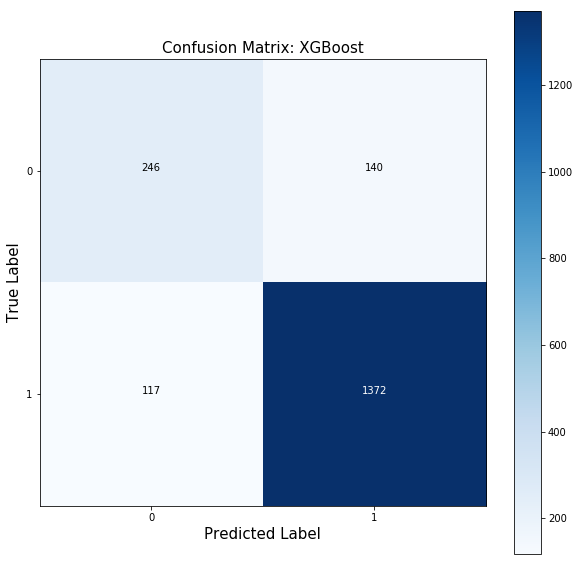

In [69]:
show_cf(y_test, test_preds, model_name='XGBoost')